In [1]:
%matplotlib inline

In [1]:
import pandas as pd, numpy as np

In [2]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer


In [3]:
def readPrepareData(filename="finalDF_56_4_SAME_SAME_SAME_.txt", drop_100ms=False):
    labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")
    if drop_100ms: 
        labels = labels[labels.ImplizitesLernen_kont>-100]
        
    feats = pd.read_csv(
        "../06_Feature Extraction/"+filename
        , sep="\t"
    ).set_index("Subject_ID")
    feats.index = map(lambda x: x[:-1] ,feats.index)
    #feats= feats[feats.columns[:-1]]

    feats = feats.sort_index()

    joinedDF = feats.join(labels,how="inner")
    
    
    kbd =  KBinsDiscretizer(5,"ordinal")

    kbd = kbd.fit_transform(joinedDF[feats.columns])
    
    
    return feats,labels,joinedDF,kbd

# Höchste Korrelationen finden

In [128]:
feats,labels,joinedDF,kbd = readPrepareData()

In [69]:
pearson_corrs = joinedDF.corr().loc[feats.columns,['ImplizitesLernen_kont','ExplizitesLernen_kont']]

In [71]:
pearson_corrs[['ImplizitesLernen_kont_abs','ExplizitesLernen_kont_abs']] = pearson_corrs.abs()

In [76]:
pearson_corrs.sort_values("ImplizitesLernen_kont_abs",ascending=False).head()[["ImplizitesLernen_kont"]].round(3)

ImplizitesLernen_kont
block2_freqband_1                        0.301
RT_std_of_median_12                      0.297
freqband_alldata_1                       0.265
PC_3_rawdata                            -0.245
part_autocorrelation_k2                  0.239

In [77]:
pearson_corrs.sort_values("ExplizitesLernen_kont_abs",ascending=False).head()[["ExplizitesLernen_kont"]].round(3)

ExplizitesLernen_kont
part_autocorrelation_k4                  0.260
freqband_alldata_8                      -0.249
PC_3_rawdata                             0.233
block2_PC5_60erBloecke                   0.211
block2_freqband_1                       -0.190

In [82]:
import seaborn as sns

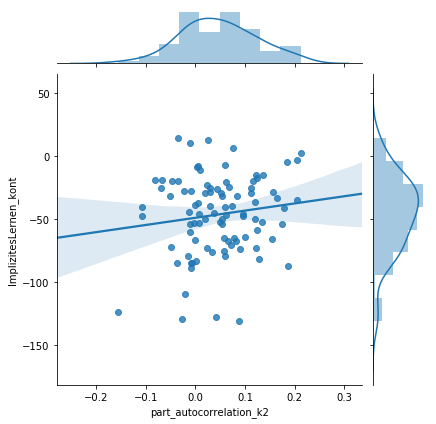

In [113]:
sns.jointplot(df_2.part_autocorrelation_k2, df_2.ImplizitesLernen_kont,kind="reg")

## PC_5 for block 2 #FFT


In [141]:
path = "../05_Datensatzvarianten erstellen/56_4_SAME_SAME_SAME_.txt"

data_raw = pd.read_csv(path,sep="\t",index_col=False) 

In [143]:
def get_blockwise_freqs(n_60er_blocks,raw_data):
    blockwise_FFT_DF = pd.DataFrame()
    n_trials = 60
    N=n_trials #number of sample points
    freq = np.fft.rfftfreq(N)[1:].tolist() #helper function
    for i_60erblock in range(1, n_60er_blocks+1):
        currentsubset = raw_data[raw_data["Block_No"]==i_60erblock]
        currentsubset_wide = currentsubset.pivot(index='Subject_ID',columns='Trial_No_in_Block') [["RT"]]
        freq_DF = pd.DataFrame()
        x = range(1,N+1)
        for row in currentsubset_wide.index: # für jede Person
            y = currentsubset_wide.loc[row] # signalraum
            Hn = np.fft.rfft(y)[1:] #Frequenraum
            Hn = np.abs(Hn)
            blockwise_FFT_DF=blockwise_FFT_DF.append(pd.Series([row,i_60erblock]+Hn.tolist()),ignore_index=True)
    blockwise_FFT_DF.columns = ["Subject_ID","Block_No"] + list(map(str, freq))
    blockwise_FFT_DF = blockwise_FFT_DF.set_index(["Subject_ID"])
    
    return freq, blockwise_FFT_DF

In [144]:
freq, blockwise_FFT_DF = get_blockwise_freqs(4,data_raw)

In [146]:
blockwise_FFT_DF

Block_No  0.016666666666666666  0.03333333333333333         0.05  \
Subject_ID                                                                     
AAR23B1          1.0            792.143150           940.532803   602.159495   
ACE11B1          1.0            474.978008          1188.784091   731.953048   
ADD25P1          1.0           1079.918094           863.040381   360.259033   
AGI16S1          1.0           1177.103480          1460.604096   522.702399   
AHR27N1          1.0            330.827985          1118.914274  1276.226215   
AIV25B1          1.0            298.803446          2218.767630  2053.586510   
AJH13B1          1.0            229.250481          1051.767343   599.262438   
AJL30S1          1.0             42.222940          1111.506953   310.981312   
AKK31B1          1.0           2155.164904           214.614971  1015.983727   
ARL17K1          1.0           2780.861375           851.057204  1079.813773   
ARO12C1          1.0           1410.120063          1989.765566   494.445772   
ATO21W1          1.0            411.996655           538.051619   622.000966   
AVR16F1          1.0            520.998788           741.347569  1215.441069   
AWJ28B1          1.0           1423.163630           965.899793  1819.635520   
BAM16A1          1.0            388.891910          1682.250297   763.026688   
BDR13B1          1.0           1547.690483          1211.660034   604.676373   
BDS23S1          1.0            787.237974           220.855575   578.799452   
BGI23S1          1.0            900.494859           778.648535   584.670467   
BMI31E1          1.0           2202.038146           517.966936  1444.082578   
BML24M1          1.0           1593.236269          1151.931569   300.115647   
BMR01N1          1.0            843.337247          1483.448805   892.126612   
BNR25W1          1.0           1333.126269           778.673411   609.978737   
BRH18F1          1.0            801.000857          1111.736711   440.250934   
BRL04L1          1.0           1330.178937           668.491868   801.669624   
BRS27B1          1.0            769.996996          1439.980073  1262.713998   
BSE11B1          1.0           1154.082846          1065.722176  1821.637904   
BWR08M1          1.0            791.458855           420.317031  1210.941994   
CBV10N1          1.0            631.069522           586.632348  1374.960135   
CFF19P1          1.0            401.398049          1294.911166   981.075670   
CGC24W1          1.0            531.665535           996.757391   853.963180   
...              ...                   ...                  ...          ...   
MGK07B1          4.0            525.991013           364.933372    52.652836   
MHU07N1          4.0           1162.497189           523.284513   569.056110   
MLS07B1          4.0           1494.488910           192.840941   819.192787   
MMK25B1          4.0           1818.831085          1639.772082   455.924798   
MMN14M1          4.0            903.719017          1389.906735   320.070133   
MMT07H1          4.0           1002.925511          1323.265197   448.569059   
MNI23B1          4.0            264.209023          1997.716876  1865.186340   
MSJ07H1          4.0            467.106168          1151.255703   950.900350   
MTC06B1          4.0           1586.766171           406.635858   913.282811   
MTF03B1          4.0           2174.044811          1752.920002  1019.691635   
MUH04O1          4.0            485.006160           853.143430   835.733583   
MWA27N1          4.0           1245.650856           589.127260  1126.742599   
NVM07B1          4.0           1254.975085           480.399131  1180.660806   
RAD19B1          4.0           1468.241453           524.383099   547.846769   
SBL15H1          4.0            664.900589           364.953732   328.558893   
SHT02N1          4.0            706.556493           321.899761   544.107989   
SJA02B1          4.0           1082.429821           419.821592   717.035667   
SJN01B1     

In [155]:
from scipy.stats import zscore

In [156]:
from sklearn.decomposition import PCA

In [157]:
#Standard PCA

freqs_blockwise = freq
freqs_blockwise_DF =blockwise_FFT_DF
blockwise_FFT_DF = freqs_blockwise_DF
blockwise_FFT_DF_PCA = blockwise_FFT_DF[[ "Block_No"] +list(map(str, freqs_blockwise))]
blockwise_FFT_DF_PCA= blockwise_FFT_DF_PCA.set_index("Block_No", append=True)
blockwise_FFT_DF_PCA = blockwise_FFT_DF_PCA.apply(zscore)

#Standard PCA
n_of_principalComponents = 5
data_PCA = PCA(n_components=n_of_principalComponents)
principalComponents = data_PCA.fit_transform(blockwise_FFT_DF_PCA)
principalComponentsDF = pd.DataFrame(data = principalComponents)
principalComponentsDF.index = blockwise_FFT_DF_PCA.index # indices rekonstruieren
names_columns= ["PC"+str(x)+"_60erBloecke" for x in range(1,n_of_principalComponents+1)]
principalComponentsDF.columns = names_columns
#tabelle rekonstruieren (wide format)
principalComponentsDF.reset_index(level="Block_No", inplace=True)
blockwise_FFT_PCA_wide_DF = principalComponentsDF.pivot(columns='Block_No')[names_columns] 
new_cols = []
for col in blockwise_FFT_PCA_wide_DF.columns:
    new_cols =new_cols+[ "block"+str(int(col[1]))+"_"+col[0]]

blockwise_FFT_PCA_wide_DF.columns = new_cols



In [160]:
data_PCA.components_.shape

(5, 30)

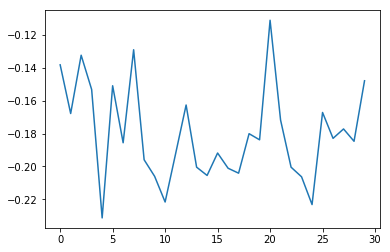

In [171]:
plt.plot(data_PCA.components_.transpose()[:,0])


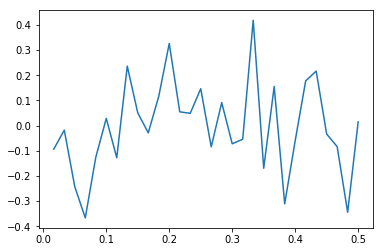

In [172]:
plt.plot(freq,data_PCA.components_.transpose()[:,4])


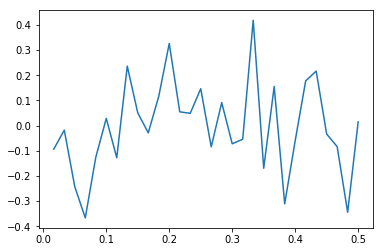

In [175]:
plt.plot(freq,data_PCA.components_.transpose()[:,4])

In [158]:
blockwise_FFT_PCA_wide_DF

block1_PC1_60erBloecke  block2_PC1_60erBloecke  \
Subject_ID                                                   
AAR23B1                   3.189164                2.696535   
ACE11B1                   1.836320                1.193804   
ADD25P1                   1.987026               -2.628225   
AGI16S1                   0.006456               -0.301845   
AHR27N1                  -0.764636                1.421454   
AIV25B1                  -2.009215               -2.863035   
AJH13B1                  -0.874881                0.604433   
AJL30S1                  -2.418550               -1.737293   
AKK31B1                  -1.952109               -3.209495   
ARL17K1                   0.090829               -2.028203   
ARO12C1                  -2.276077               -0.741703   
ATO21W1                   2.584550                2.490278   
AVR16F1                  -0.702976               -0.104507   
AWJ28B1                  -1.244522                1.817689   
BAM16A1                  -0.592053               -1.295305   
BDR13B1                   1.131524                3.629966   
BDS23S1                   3.683195                2.783190   
BGI23S1                  -2.796351               -1.642557   
BMI31E1                  -1.703871                0.377603   
BML24M1                  -1.370326               -0.424062   
BMR01N1                   1.268192                2.866166   
BNR25W1                   1.783049               -0.033241   
BRH18F1                   2.611956                4.126178   
BRL04L1                  -2.896583                2.859912   
BRS27B1                   0.148198               -0.245586   
BSE11B1                  -1.098800                0.607332   
BWR08M1                   0.544684               -1.362086   
CBV10N1                  -1.062156                1.613200   
CFF19P1                   1.591751               -3.077943   
CGC24W1                   2.032823                5.017679   
...                            ...                     ...   
MGK07B1                  -0.942569               -0.290342   
MHU07N1                  -0.026981                0.152189   
MLS07B1                  -1.030830               -2.176083   
MMK25B1                   0.350551                0.602511   
MMN14M1                   2.107470                1.562061   
MMT07H1                  -1.099134                1.814537   
MNI23B1                  -3.249669               -3.259751   
MSJ07H1                  -1.479562                0.499664   
MTC06B1                  -2.166212               -0.288999   
MTF03B1                   0.669124               -0.910238   
MUH04O1                  -1.713481               -1.984375   
MWA27N1                   0.814202                4.004514   
NVM07B1                  -0.624368               -1.039488   
RAD19B1                  -1.763488                0.887031   
SBL15H1                   1.028727                1.258937   
SHT02N1                   5.002361                3.727477   
SJA02B1                  -0.474656               -1.733022   
SJN01B1                  -1.323264               -4.467344   
SJO18S1                  -2.822431               -2.291012   
SKB08F1                  -0.953296               -0.823538   
SMS30P1                  -0.993506                0.566198   
THV03F1                   3.900433                2.572511   
TSL14D1                  -0.655134                0.677933   
UFA18E1                   0.959775                2.866821   
USM08B1                  -1.349101               -3.256685   
VGR24B1                   8.060772                2.688691   
VJM28H1                   3.410290                1.672656   
VJR20B1                  -2.585126               -4.142793   
VWG04S1                   0.922929                1.314813   
WJJ05M1                   4.027345                4.915128   

            block3_PC1_60erBloecke  block4_PC1_60erBloecke  \
Subject_ID                                 

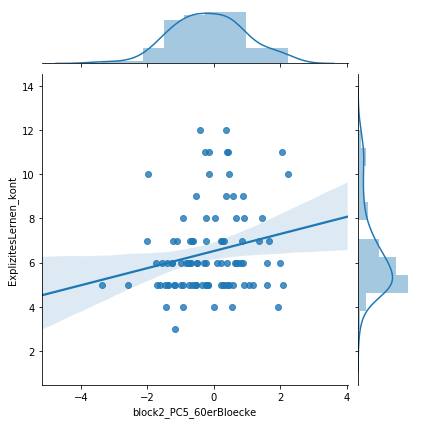

In [130]:
sns.jointplot(joinedDF.block2_PC5_60erBloecke, joinedDF.ExplizitesLernen_kont,kind="reg")

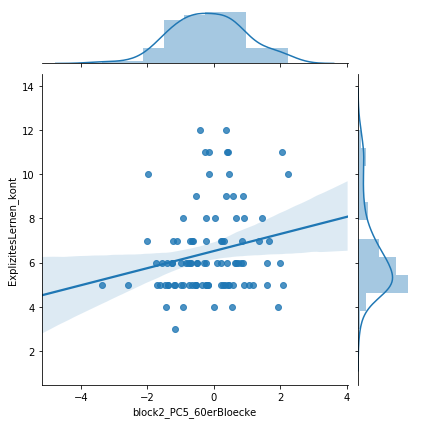

In [138]:
sns.jointplot(joinedDF.block2_PC5_60erBloecke, joinedDF.ExplizitesLernen_kont,kind="reg")

In [140]:
list(feats.columns)

['RT_mean',
 'RT_std',
 'RT_median',
 'RT_Q1',
 'RT_Q3',
 'RT_IQA',
 'RT_gini',
 'RT_propExtreme',
 'Korrekt_prop',
 'RT_slope',
 'RT_intercept',
 'RT_mean_HandSwitchCost',
 'RT_mean_tradPES',
 'RT_mean_robustPES',
 'RT_mean_of_median_12',
 'RT_std_of_median_12',
 'RT_slope_of_median_12',
 'RT_mean_of_std_12',
 'RT_std_of_std_12',
 'RT_slope_of_std_12',
 'RT_mean_of_IQA_12',
 'RT_std_of_IQA_12',
 'RT_slope_of_IQA_12',
 'RT_mean_of_Gini_12',
 'RT_std_of_Gini_12',
 'RT_slope_of_Gini_12',
 'PC_1_rawdata',
 'PC_2_rawdata',
 'PC_3_rawdata',
 'freqband_alldata_1',
 'freqband_alldata_2',
 'freqband_alldata_3',
 'freqband_alldata_4',
 'freqband_alldata_5',
 'freqband_alldata_6',
 'freqband_alldata_7',
 'freqband_alldata_8',
 'freqband_alldata_9',
 'freqband_alldata_10',
 'PCA_of_FFTfreq_alldata_1',
 'PCA_of_FFTfreq_alldata_2',
 'PCA_of_FFTfreq_alldata_3',
 'PCA_of_FFTfreq_alldata_4',
 'PCA_of_FFTfreq_alldata_5',
 'block1_freqband_1',
 'block2_freqband_1',
 'block3_freqband_1',
 'block4_freqban

In [139]:
joinedDF[["block2_PC5_60erBloecke","ExplizitesLernen_kont"]].corr()

block2_PC5_60erBloecke  ExplizitesLernen_kont
block2_PC5_60erBloecke                1.000000               0.211027
ExplizitesLernen_kont                 0.211027               1.000000

## PC_3

PC 3 inspektion des scatter plots -> v.a. wegen zweier Punkte, wenn die weg sind es nur noch -.15

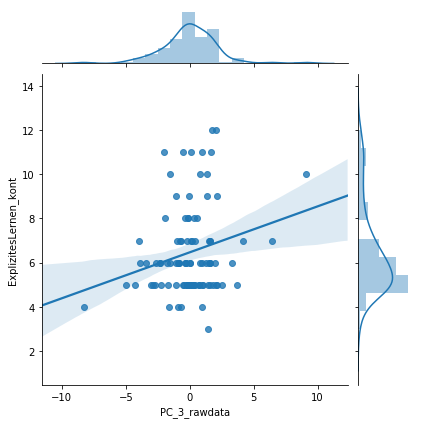

In [86]:
sns.jointplot(joinedDF.PC_3_rawdata, joinedDF.ExplizitesLernen_kont,kind="reg")

In [87]:
df_ = joinedDF[(joinedDF.PC_3_rawdata<7) &  (joinedDF.PC_3_rawdata>-6)]

In [90]:
df_[["PC_3_rawdata", "ExplizitesLernen_kont"]].corr()

PC_3_rawdata  ExplizitesLernen_kont
PC_3_rawdata               1.000000               0.134657
ExplizitesLernen_kont      0.134657               1.000000

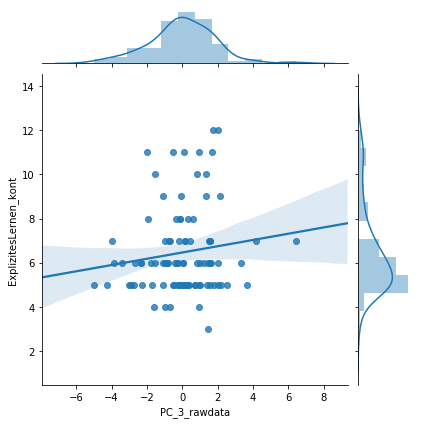

In [88]:
sns.jointplot(df_.PC_3_rawdata, df_.ExplizitesLernen_kont,kind="reg")

## das gleiche für implizites Lernen

In [177]:
df_2 = joinedDF[joinedDF.ImplizitesLernen_kont>-150]

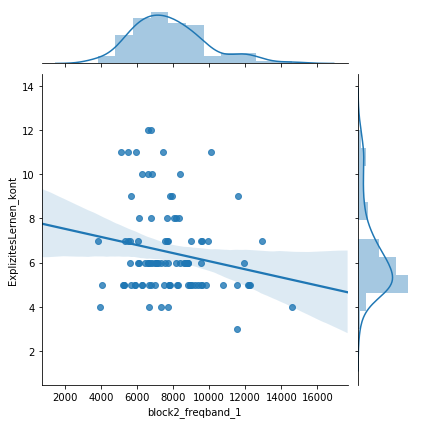

In [178]:
sns.jointplot(joinedDF.block2_freqband_1, joinedDF.ExplizitesLernen_kont,kind="reg")

In [ ]:
sns.jointplot(df_2.block2_freqband_1, df_2.ImplizitesLernen_kont,kind="reg")

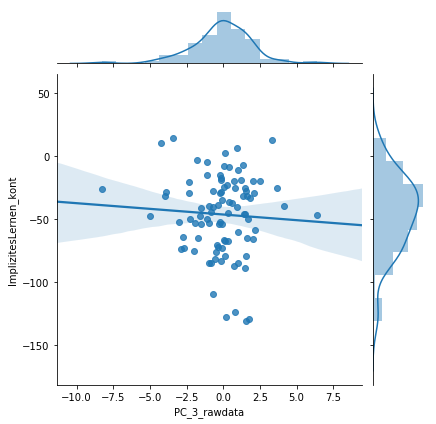

In [105]:
sns.jointplot(df_2.PC_3_rawdata, df_2.ImplizitesLernen_kont,kind="reg")

In [ ]:
pearson_corrs[PC_3_rawdata]

## wie sieht PCA3 aus?

In [10]:
path = "../05_Datensatzvarianten erstellen/56_4_SAME_SAME_SAME_.txt"

    data_raw = pd.read_csv(path,sep="\t",index_col=False) 

    raw_data = correct_rawdata(data_raw)   

In [128]:
from scipy.stats import zscore

In [129]:
raw_data_wide_z = data_wide.apply(zscore) #z-transformierte Werte

In [131]:
raw_data_wide_z.shape

(97, 240)

In [135]:
from sklearn.decomposition import PCA

In [138]:
data_PCA,principalComponentsDF  = get_PCA_components_over_rawdata(raw_data_wide_z)

In [142]:
data_PCA.components_.shape

(3, 240)

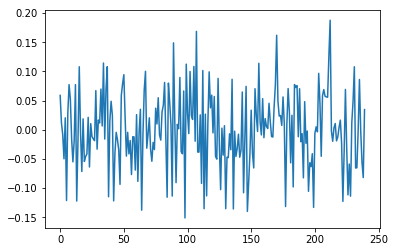

In [148]:
plt.plot(data_PCA.components_.transpose()[:,2])

In [150]:
principalComponentsDF.sort_values("PC_3_rawdata").head()

PC_1_rawdata  PC_2_rawdata  PC_3_rawdata
Subject_ID                                          
SJN01B1         5.667987     -6.312271     -8.308048
ADD25P1        -5.165503      0.542372     -5.012984
KHM10S1        10.618437     -4.841850     -4.263100
MSJ07H1       -10.942387     -0.283231     -3.953898
EMG01D1        -3.949596     -0.422902     -3.882105

In [151]:
principalComponentsDF.sort_values("PC_3_rawdata").tail()

PC_1_rawdata  PC_2_rawdata  PC_3_rawdata
Subject_ID                                          
MLS07B1        -0.866976      1.804946      3.297671
MGK07B1        10.484028      2.068461      3.687635
AKK31B1        -1.862246     -1.907035      4.156077
AIV25B1         4.694836     -5.986548      6.422279
MNI23B1        -4.200561     -2.498208      9.082253

# temporal distribution of RT

In [36]:
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [38]:
path = "../05_Datensatzvarianten erstellen/56_4_SAME_SAME_SAME_.txt"

data_raw = pd.read_csv(path,sep="\t",index_col=False) 

raw_data = correct_rawdata(data_raw)   

In [39]:
raw_data=raw_data.set_index("Subject_ID")

In [40]:

raw_data.index = map(lambda x: x[:-1] ,raw_data.index)

In [41]:
raw_data_ = raw_data.join(labels).dropna()

In [74]:
raw_data_ = raw_data_.replace(
    {"ExplizitesLernen_dich":{1:"E+",0:"E-"},
     "ImplizitesLernen_dich":{1:"I+",0:"I-"}
    })

In [75]:
raw_data_.head()

Trial_No  Block_No   RT  Response  Correct_Response  response_correct  \
AAR23B         1         1  800         2                 2              True   
AAR23B         2         1  701         1                 1              True   
AAR23B         3         1  678         4                 4              True   
AAR23B         4         1  655         3                 3              True   
AAR23B         5         1  809         4                 4              True   

        zwoelferabschnitt_No  RT_kg900  hand_switch  Trial_No_in_Block  \
AAR23B                     1     False        False                  1   
AAR23B                     1      True        False                  2   
AAR23B                     1     False         True                  3   
AAR23B                     1      True        False                  4   
AAR23B                     1      True        False                  5   

        post_error  ImplizitesLernen_kont ImplizitesLernen_dich  \
AAR23B       False             -70.678889                    I+   
AAR23B       False             -70.678889                    I+   
AAR23B       False             -70.678889                    I+   
AAR23B       False             -70.678889                    I+   
AAR23B       False             -70.678889                    I+   

        ExplizitesLernen_kont ExplizitesLernen_dich  
AAR23B                    5.0                    E-  
AAR23B                    5.0                    E-  
AAR23B                    5.0                    E-  
AAR23B                    5.0                    E-  
AAR23B                    5.0                    E-

In [83]:
raw_data_["group"] = raw_data_.ExplizitesLernen_dich + raw_data_.ImplizitesLernen_dich

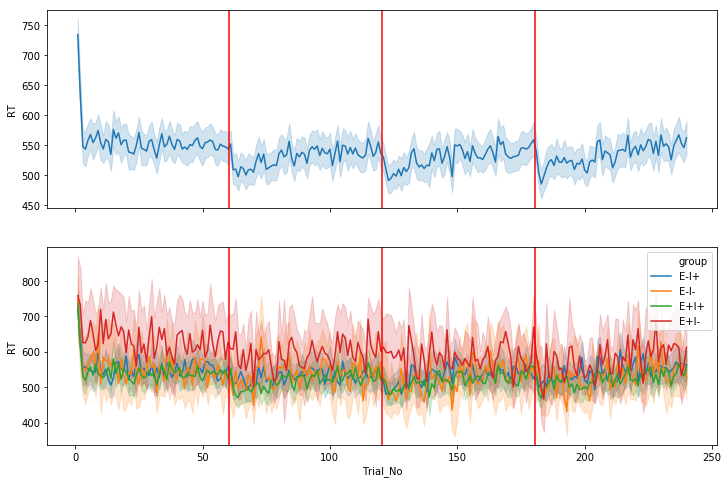

In [89]:
min_data = raw_data_.RT.min()
max_data = raw_data_.RT.max()

fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(12,8))

sns.lineplot(x="Trial_No",y="RT",data=raw_data_,ci=95,ax=axs[0])
axs[0].axvline(60.5,min_data,max_data,color='red')
axs[0].axvline(120.5,min_data,max_data,color='red')
axs[0].axvline(180.5,min_data,max_data,color='red')

sns.lineplot(x="Trial_No",y="RT",hue="group", data=raw_data_,ci=95,ax=axs[1])

#sns.lineplot(x="Trial_No",y="RT",data=raw_data_,ci=95)
axs[1].axvline(60.5,min_data,max_data,color='red')
axs[1].axvline(120.5,min_data,max_data,color='red')
axs[1].axvline(180.5,min_data,max_data,color='red')


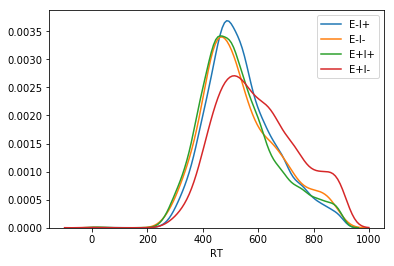

In [100]:
sns.distplot(raw_data_[raw_data_.group=="E-I+"].RT,label="E-I+",hist_kws=dict(alpha=0.1),hist=False)
sns.distplot(raw_data_[raw_data_.group=="E-I-"].RT,label="E-I-",hist_kws=dict(alpha=0.1),hist=False)
sns.distplot(raw_data_[raw_data_.group=="E+I+"].RT,label="E+I+",hist_kws=dict(alpha=0.1),hist=False)
sns.distplot(raw_data_[raw_data_.group=="E+I-"].RT,label="E+I-",hist_kws=dict(alpha=0.1),hist=False)
plt.legend()

# Helper Functions

In [17]:
#Hilfsfunktionen
def correct_rawdata(raw_data):
    raw_data = raw_data.drop(labels=["Event_Code","makroabschnitt" ],axis=1)
    raw_data["zwoelferabschnitt_No"] = np.ceil(raw_data["Trial_No"]*1.0/12).astype(int) # muss korrigiert werden (TrialNo stimmt leider nicht)
    return raw_data

In [18]:
# what is PC_3?

def get_wide_df(raw_data):
    data_wide = raw_data.pivot(index='Subject_ID',columns='Trial_No') [["RT"]]
    columns_head = ["RT_"+str(x) for x in range(1,len(data_wide.columns)+1)]
    data_wide.columns = columns_head
    return data_wide

In [19]:
def get_aggregates_from_dimensionalityReduction(raw_data):
    #Datensatz auf nötigste Attribute reduzieren
    raw_data = raw_data[["Subject_ID","Block_No","Trial_No","Trial_No_in_Block", "RT"]]
    raw_data_wide = get_wide_df(raw_data)
    raw_data_wide_z = raw_data_wide.apply(zscore) #z-transformierte Werte
    
    
    PCA_components_over_rawdata =  get_PCA_components_over_rawdata(raw_data_wide_z)

In [20]:
def get_PCA_components_over_rawdata(raw_data_wide_z):
    #indices auslesen für PCA-Tabellen (VPN Kürzel gehen verloren)
    indices = raw_data_wide_z.index
    #values for three PC are calculated, explaining in total 
    # 40.77034688+   3.12400237+   3.03860655, =46% 
    # aufgeklärte Varianz, anscheinend nur eine PCA sinnvoll, aber 3 der vollständigkeit halber
    #'source' http://blog.nextgenetics.net/?e=42
    n_of_principalComponents = 3
    data_PCA = PCA(n_components=n_of_principalComponents).fit(raw_data_wide_z)
    principalComponents = data_PCA.transform(raw_data_wide_z)
    principalComponentsDF = pd.DataFrame(data = principalComponents)
    principalComponentsDF.index = indices
    principalComponentsDF.columns = ["PC_"+str(x)+"_rawdata" for x in range(1, n_of_principalComponents+1)]
    return data_PCA,principalComponentsDF